In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


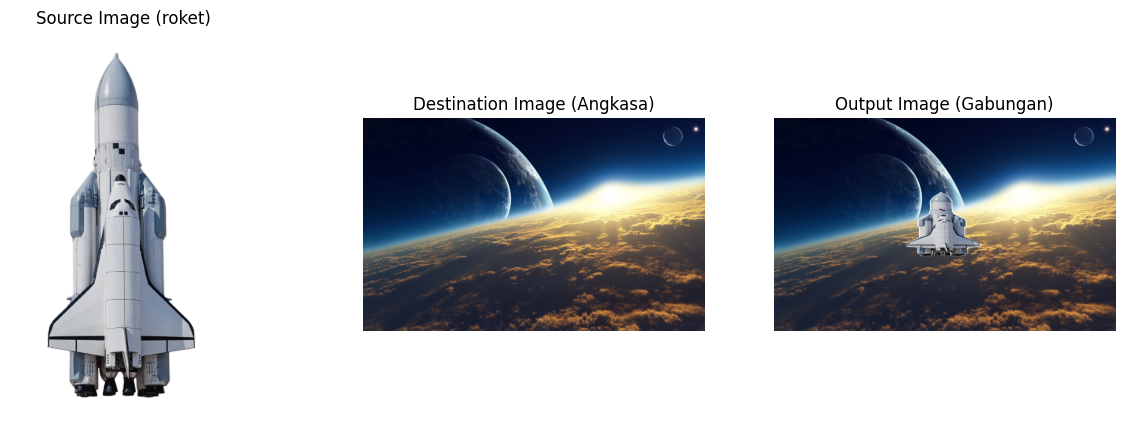

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


source_img = cv2.imread('/content/drive/MyDrive/images/rokettt.png', cv2.IMREAD_UNCHANGED)
destination_img = cv2.imread('/content/drive/MyDrive/images/angkasa.jpg')


if source_img.shape[2] == 3:
    source_img = cv2.cvtColor(source_img, cv2.COLOR_BGR2BGRA)


h, w = source_img.shape[:2]
source_points = np.float32([[0, 0], [w, 0], [0, h], [w, h]])


dst_h, dst_w = destination_img.shape[:2]
destination_points = np.float32([[dst_w//3, dst_h//3], [2*dst_w//3, dst_h//3],
                                 [dst_w//3, 2*dst_h//3], [2*dst_w//3, 2*dst_h//3]])

# Compute the perspective transform matrix
matrix = cv2.getPerspectiveTransform(source_points, destination_points)

# Apply the perspective transformation
warped_image = cv2.warpPerspective(source_img, matrix, (dst_w, dst_h))

# Create a mask from the alpha channel of the warped image
mask = warped_image[:, :, 3]
mask_inv = cv2.bitwise_not(mask)
warped_image = warped_image[:, :, :3]

# Black-out the area of the transformed image in the destination image
bg = cv2.bitwise_and(destination_img, destination_img, mask=mask_inv)
fg = cv2.bitwise_and(warped_image, warped_image, mask=mask)

# Combine background and foreground
final_image = cv2.add(bg, fg)

# Show the result
plt.figure(figsize=(15, 5))

# Display source image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(source_img, cv2.COLOR_BGRA2RGBA))
plt.title("Source Image (roket)")
plt.axis("off")

# Display destination image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(destination_img, cv2.COLOR_BGR2RGB))
plt.title("Destination Image (Angkasa)")
plt.axis("off")

# Display final output image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title("Output Image (Gabungan)")
plt.axis("off")

plt.show()
